In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
# Load the dataset
data = pd.read_csv("winequality-red.csv")

# Printing information about the data frame
data.info()

print()

# Printing statistics of the dataframe
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Preprocressing the data

In [3]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
data.shape

(1599, 12)

In [5]:
data.duplicated().sum()

240

In [6]:
# Removing duplicate rows
data.drop_duplicates(keep = 'first',inplace = True, ignore_index = True)
data.shape

(1359, 12)

## Data visualization

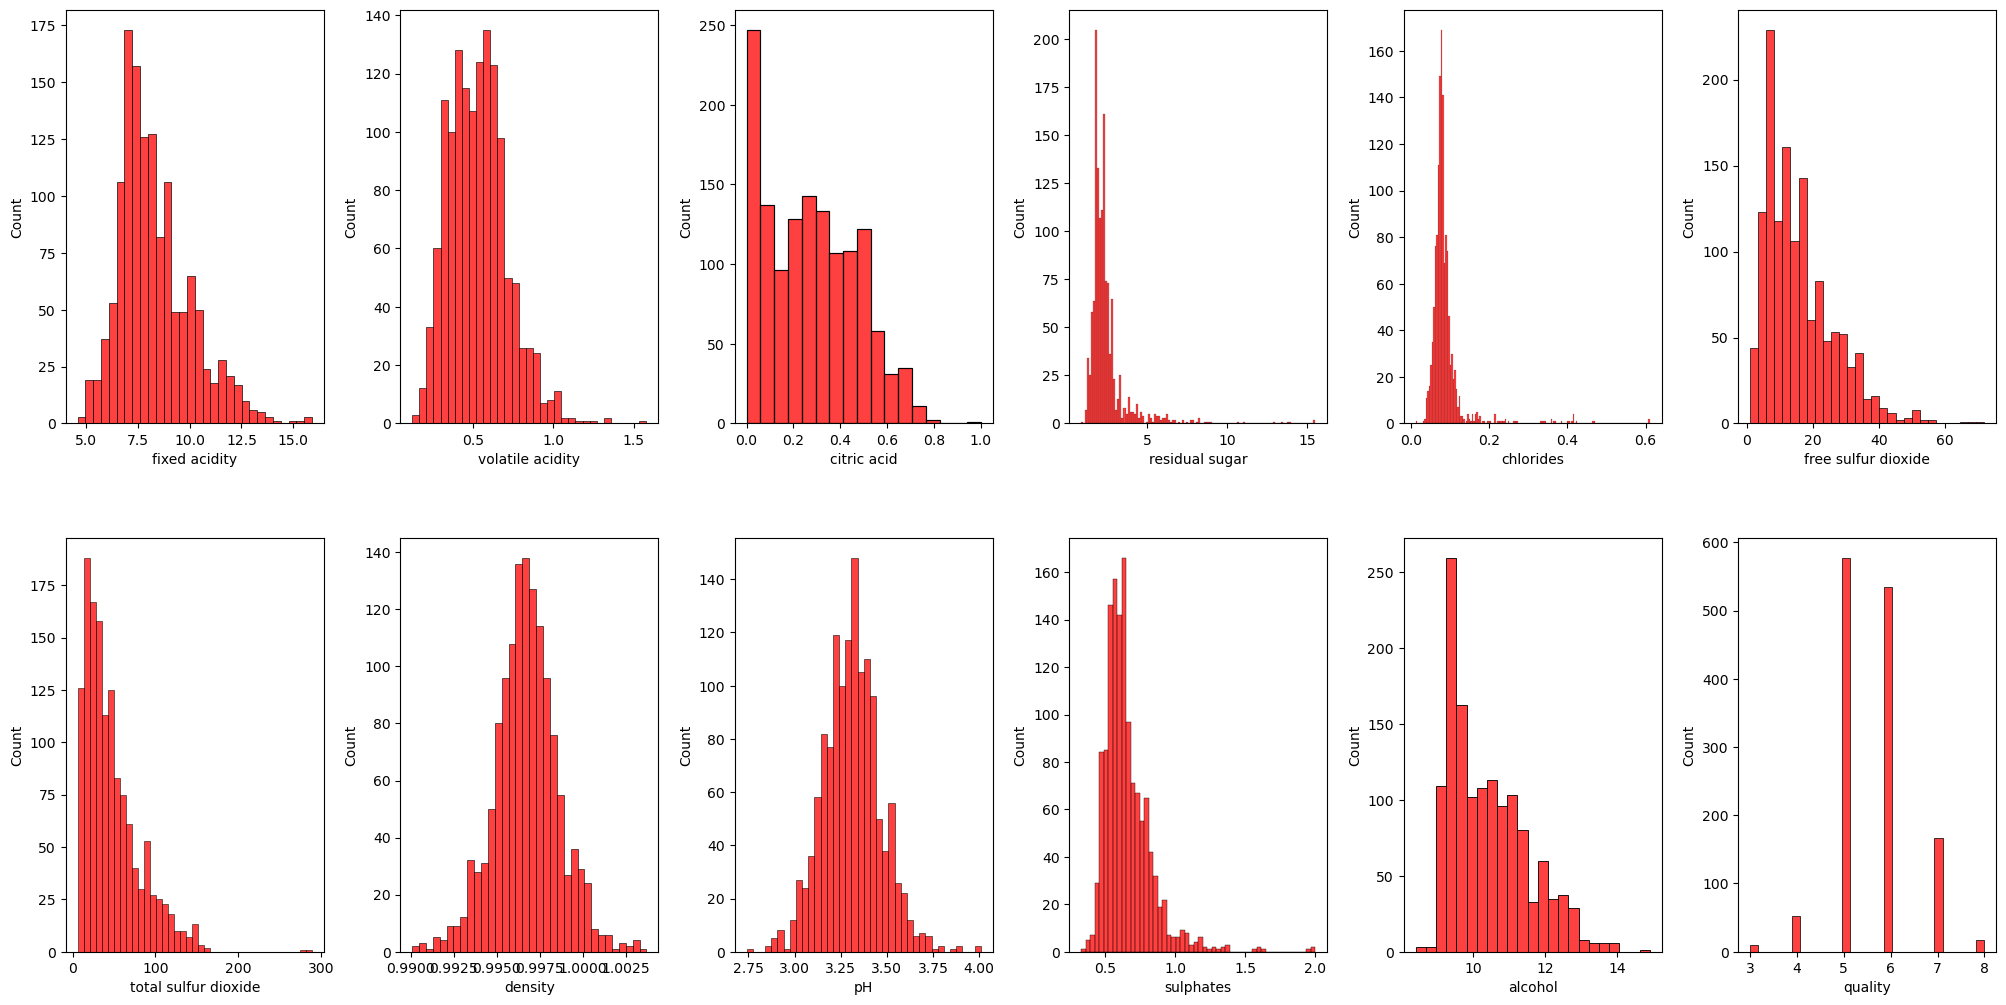

In [7]:
# Visualization 1: Create dist plots using sns.histplot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    sns.histplot(value, color='r', ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


<Figure size 1000x600 with 0 Axes>

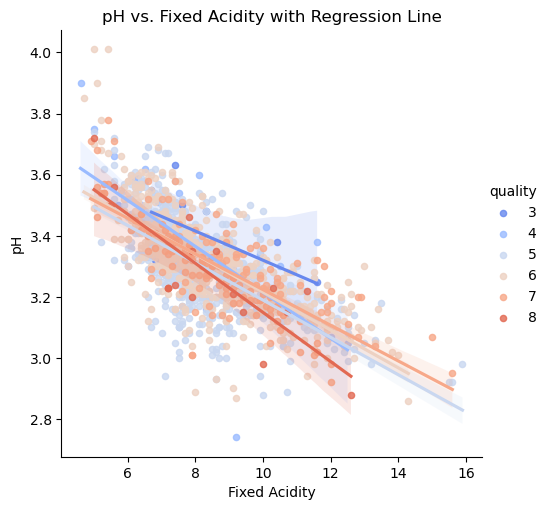

In [8]:
# Visualization 2: pH vs. Fixed Acidity with Regression Line
plt.figure(figsize=(10, 6))
sns.lmplot(x='fixed acidity', y='pH', data=data, hue='quality', palette='coolwarm', scatter_kws={"s": 20})
plt.title("pH vs. Fixed Acidity with Regression Line")
plt.xlabel("Fixed Acidity")
plt.ylabel("pH")
plt.show()

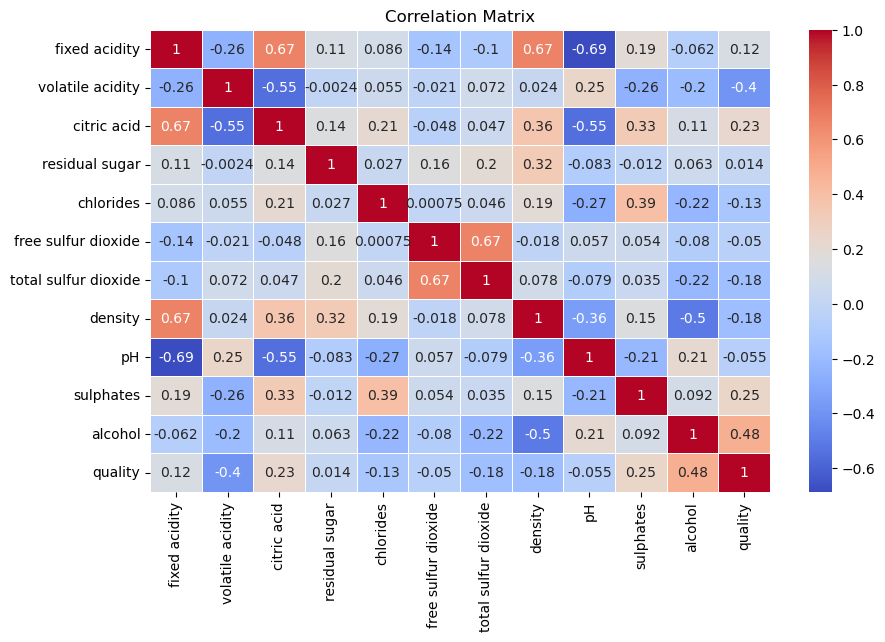

In [9]:
# Visualization 3: Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


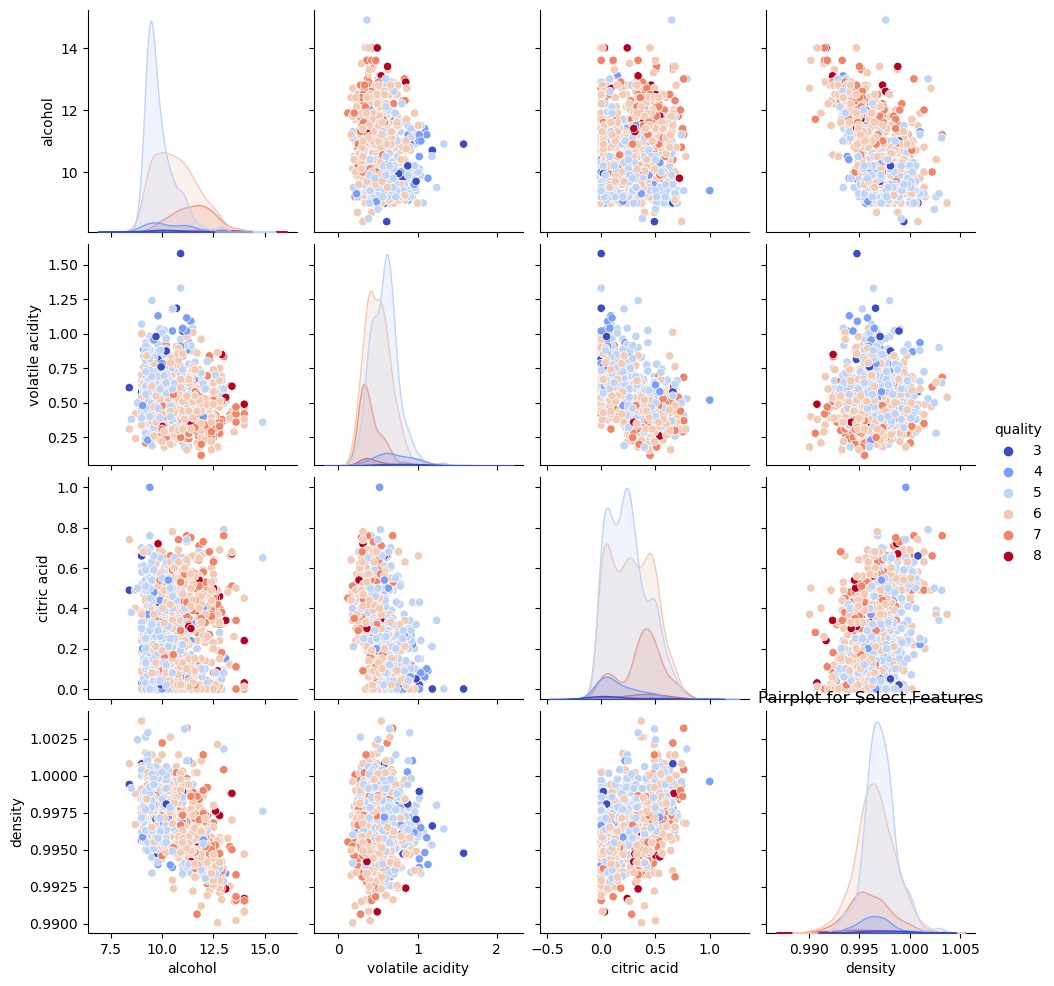

In [10]:
# Visualization 4: Pairplot for Select Features
select_features = ['alcohol', 'volatile acidity', 'citric acid', 'density', 'quality']
sns.pairplot(data[select_features], hue='quality', palette='coolwarm')
plt.title("Pairplot for Select Features")
plt.show()

## Implementation of Linear regression model

In [11]:
data['pH'].value_counts()

3.30    47
3.26    45
3.36    42
3.38    41
3.32    40
        ..
3.75     1
3.85     1
2.74     1
3.70     1
2.90     1
Name: pH, Length: 89, dtype: int64

In [12]:
# Define Min-Max scaling function
def min_max_scaling(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

# Create a DataFrame excluding the 'pH' column
X_data = data.drop('pH', axis=1)
Y_target = data['pH']

# Apply Min-Max scaling to each feature
x_scaled = X_data.apply(min_max_scaling)

In [13]:
# Define the test size and random seed
test_size = 0.2
random_seed = 64

# Shuffle the data
data_shuffled = data.sample(frac=1, random_state=random_seed)

# Calculate the number of samples for the test set
num_samples = len(data_shuffled)
num_test_samples = int(test_size * num_samples)

# Split the data into training and test sets
X_train = x_scaled.iloc[num_test_samples:]
X_test = x_scaled.iloc[:num_test_samples]

# Separate the features and target variables
y_train = data_shuffled['pH'].iloc[num_test_samples:]
y_test = data_shuffled['pH'].iloc[:num_test_samples]

In [14]:
print("X_data Shape: ", X_data.shape)
print("Y_target Shape: ", Y_target.shape)
print()
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print()
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_data Shape:  (1359, 11)
Y_target Shape:  (1359,)

X_train Shape:  (1088, 11)
y_train Shape:  (1088,)

X_test Shape:  (271, 11)
y_test Shape:  (271,)


In [15]:
def linear_regression_closed_form(x_train, y_train):
    feature_coefficients_dot = np.linalg.inv(np.dot(np.transpose(x_train), x_train))
    target_feature_dot = np.dot(np.transpose(x_train), y_train)
    weights = np.dot(feature_coefficients_dot, target_feature_dot)
    return weights

MSE Loss for Training Data: 0.18784924519802845
Final Weight Vector: [-1.37989741  1.6426963   0.44911755 -1.31989431  1.25116894  0.67232522
  0.28892618  3.54586068 -0.4675259   1.89739931  1.30686967]
MSE Loss for Test Data: 0.17424742118317305


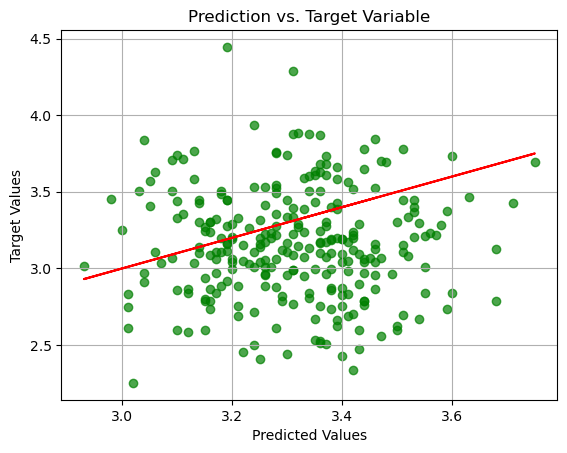

In [16]:
# Calculate the weights using your function
weights = linear_regression_closed_form(X_train, y_train)

# Calculate predictions on the training data
y_pred_train = np.dot(X_train, np.transpose(weights))

# Calculate the Mean Squared Error (MSE) for the training data
mse_loss_train = np.sum(np.square(y_train - y_pred_train)) / len(y_train)
print("MSE Loss for Training Data:", mse_loss_train)

print("Final Weight Vector:", weights)

# Calculate predictions on the test data
y_pred = np.dot(X_test, np.transpose(weights))

# Calculate the Mean Squared Error (MSE) for the test data
mse_loss = np.sum(np.square(y_test - y_pred)) / len(y_test)
print("MSE Loss for Test Data:", mse_loss)

# Visualize predictions vs. target variable
plt.scatter(y_test, y_pred, color='green', alpha=0.7)
plt.plot(y_test, y_test, color='red')
plt.title("Prediction vs. Target Variable")
plt.xlabel("Predicted Values")
plt.ylabel("Target Values")
plt.savefig("linear_predictedvstarget.png", dpi=300, format='png')
plt.grid()
plt.show()
